## KMeans Algorithm

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
df.shape

(4000, 3)

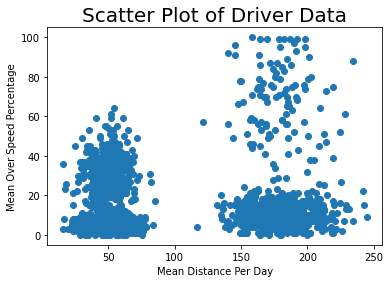

In [7]:
plt.plot(df.mean_dist_day, df.mean_over_speed_perc, 'o')
plt.xlabel('Mean Distance Per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.title('Scatter Plot of Driver Data', fontsize=20)
plt.show()

In [8]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [36]:
data = df.drop(['id'], axis=1)
cluster_model = KMeans(n_clusters=2)
cluster_model.fit(data)

KMeans(n_clusters=2)

In [37]:
df['labels'] = cluster_model.labels_

In [38]:
df.head()

,id,mean_dist_day,mean_over_speed_perc,labels
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0


In [39]:
df.labels.unique()

array([0, 1])

In [13]:
df['labels'].value_counts()

0    3200
1     800
Name: labels, dtype: int64

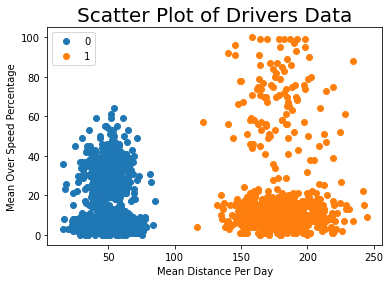

In [40]:
for label in df.labels.unique():
    plt.plot(df.loc[df.labels == label, 'mean_dist_day'],
            df.loc[df.labels == label, 'mean_over_speed_perc'], 'o', label=label)
plt.xlabel('Mean Distance Per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.title('Scatter Plot of Drivers Data', fontsize=20)
plt.legend()
plt.show()

In [41]:
cluster_model.cluster_centers_

array([[ 50.04763438,   8.82875   ,   0.266875  ],
       [180.017075  ,  18.29      ,   1.25875   ]])

In [31]:
error = []
for k in range(1,11):
    cluster_model = KMeans(k)
    cluster_model.fit(data)
    error.append(cluster_model.inertia_)

In [32]:
error


[12184626.129627962,
 1316420.8509477214,
 992634.0606702507,
 719601.5383469048,
 534796.9827727872,
 372842.8045249547,
 319756.7719059419,
 276964.8781593559,
 252664.2284034934,
 230685.71540818017]

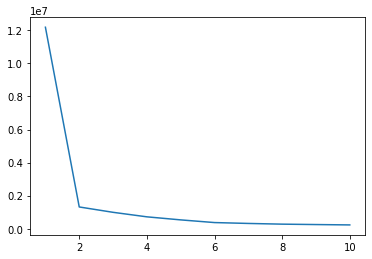

In [42]:
plt.plot(range(1,11), error)
plt.show()